In [1]:
import pandas as pd;
import numpy as np;

In [2]:
df = pd.read_csv('athlete_events.csv');
region_df = pd.read_csv('noc_regions.csv');

# Medal Tally

In [4]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [6]:
df = df[df['Season']== 'Summer'];

In [7]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0    1                           A Dijiang   M  24.0   180.0    80.0   
1    2                            A Lamusi   M  23.0   170.0    60.0   
2    3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

              Team  NOC        Games  Year  Season         City       Sport  \
0            China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer       London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
26     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                           Event Medal  
0    Basketball Men's Basketball   NaN  
1   Judo Men's Extra-Lightweight   NaN  
2        Football Men's Football   NaN  
3    Tug-Of-War Men's Tug-Of-War  Gold  
26  Athletics Women's 100 metres   NaN

In [8]:
region_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [9]:
df = df.merge(region_df,on='NOC',how='left');

In [10]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True);

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [16]:
pd.get_dummies(df['Medal'])

Bronze   Gold  Silver
0        False  False   False
1        False  False   False
2        False  False   False
3        False   True   False
4        False  False   False
...        ...    ...     ...
222547   False  False   False
222548   False  False   False
222549   False  False   False
222550   False  False   False
222551   False  False   False

[221167 rows x 3 columns]

In [17]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1);

In [18]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [19]:
df.shape

(221167, 20)

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [21]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal','Season']);

In [22]:
medal_tally.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [23]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index();

In [24]:
medal_tally.head(65)

region  Gold  Silver  Bronze
0          USA  1035     802     708
1       Russia   592     498     487
2      Germany   444     457     491
3           UK   278     317     300
4       France   234     256     287
..         ...   ...     ...     ...
60  Luxembourg     4       2       0
61      Latvia     3      11       5
62     Nigeria     3       8      13
63    Zimbabwe     3       4       1
64     Tunisia     3       3       7

[65 rows x 4 columns]

In [25]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze'];

In [26]:
medal_tally

region  Gold  Silver  Bronze  Total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [27]:
year = df['Year'].unique().tolist();
year.sort();
year.insert(0,'Overall')
print(year);

['Overall', 1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


In [28]:
country = np.unique(df['region'].dropna().values).tolist();
country.sort();

In [29]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [30]:
country.insert(0,'Overall');
print(country)

['Overall', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland'

In [31]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [32]:
def fetch_medal_tally(year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if(year == 'Overall' and country == 'Overall'):
        medal_df = medal_df
    if(year == 'Overall' and country != 'Overall'):
        flag = 1;
        medal_df = medal_df[medal_df['region'] == country]
    if(year != 'Overall' and country == 'Overall'):
        medal_df = medal_df[medal_df['Year'] == int(year)]
    if(year != 'Overall' and country != 'Overall'):
        medal_df = medal_df[(medal_df['Year'] == year)&(medal_df['region'] == country)]
        
    if flag == 1:
        medal_df = medal_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        medal_df = medal_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    medal_df['Total'] = medal_df['Gold'] + medal_df['Silver'] + medal_df['Bronze'];
    print(medal_df)
    

In [33]:
fetch_medal_tally("Overall","Overall")

            region  Gold  Silver  Bronze  Total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]


# Overall Analysis

In [35]:
df['Year'].unique().shape
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [36]:
df['Name'].unique().shape

(116122,)

In [37]:
df['City'].unique().shape
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [38]:
nation_over_time_df = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year').reset_index()
nation_over_time_df = nation_over_time_df.drop('index', axis=1)
nation_over_time_df

Year  count
0   1896     12
1   1900     31
2   1904     14
3   1906     20
4   1908     22
5   1912     29
6   1920     29
7   1924     45
8   1928     46
9   1932     47
10  1936     49
11  1948     59
12  1952     67
13  1956     71
14  1960     83
15  1964     93
16  1968    111
17  1972    120
18  1976     91
19  1980     80
20  1984    139
21  1988    156
22  1992    168
23  1996    196
24  2000    199
25  2004    200
26  2008    202
27  2012    203
28  2016    204

In [39]:
nation_over_time_df = nation_over_time_df.rename(columns={'count':'no_of_countries'})

In [40]:
import plotly.express as px

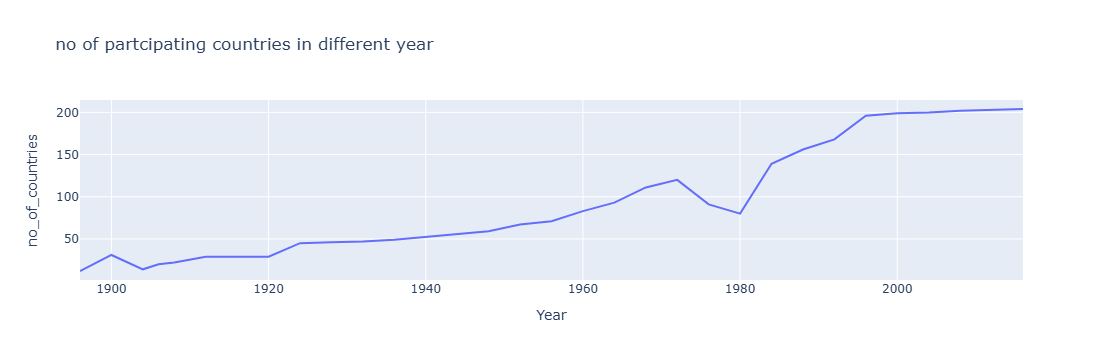

In [41]:
fig = px.line(nation_over_time_df, x="Year", y="no_of_countries",title='no of partcipating countries in different year')
fig.show()

In [42]:
def partcipating_countries_in_different_year(df):
    nation_over_time_df = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
    nation_over_time_df = nation_over_time_df.rename(columns={'count':'no_of_countries'})
    fig = px.line(nation_over_time_df, x="Year", y="no_of_countries",title='no of partcipating countries in different year')
    fig.show()

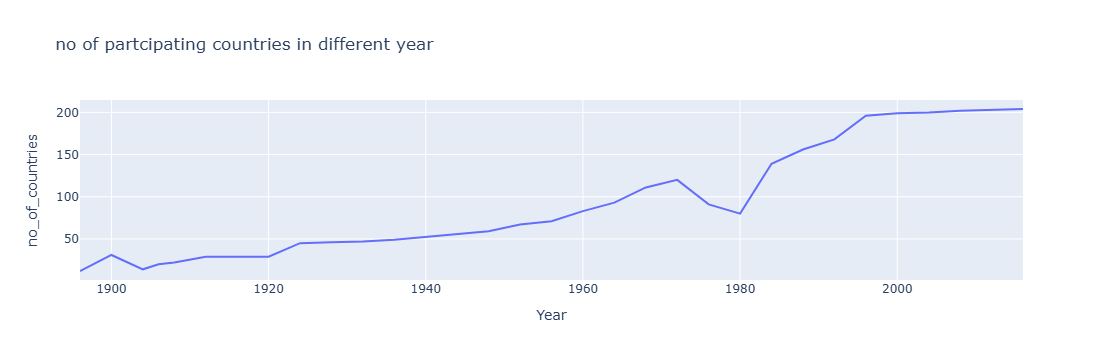

In [43]:
partcipating_countries_in_different_year(df)

In [44]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [45]:
def most_sucessfull_athlete(df,sport):
     temp_df = df.dropna(subset=['Medal'])
     if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

     temp_df = temp_df['Name'].value_counts().reset_index().head(15)
     final_df = temp_df.merge(df, left_on='Name', right_on='Name', how='left').drop_duplicates(subset=['Name'])
     final_df = final_df[['Name', 'Sport', 'no of medals', 'region']].reset_index()
     final_df = final_df.drop('index', axis=1)
     return final_df

# Country Wise anlysis

In [47]:
temp_df = df.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [48]:
temp_df = temp_df [temp_df['region'] == 'China']
final_df = temp_df.groupby('Year').count()['Medal'].reset_index()


In [49]:
final_df

Year  Medal
0  1984     32
1  1988     28
2  1992     53
3  1996     51
4  2000     58
5  2004     64
6  2008    100
7  2012     89
8  2016     70

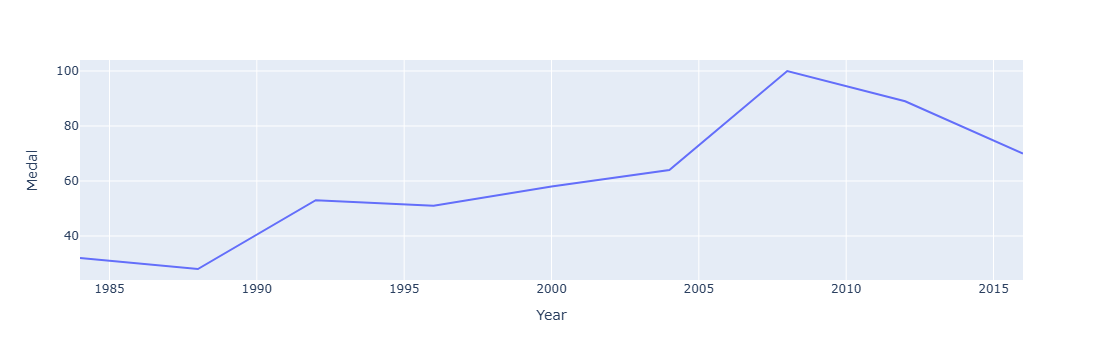

In [50]:
fig = px.line(final_df,x="Year",y ="Medal")
fig.show()

In [51]:
temp_df = df.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
temp_df

ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
12          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
13          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
15          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
16          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
222486  135521                        Anton Zwerina   M  23.0     NaN    66.0   
222508  135535            Claudia Antoinette Zwiers   F  22.0   181.0    78.0   
222526  135553  Galina Ivanovna Zybina (-Fyodorova)   F  21.0   168.0    80.0   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   

                  Team  NOC        Games  Year  Season       City  \
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
12             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
13             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
15             Finland  FIN  1948 Summer  1948  Summer     London   
16             Finland  FIN  1948 Summer  1948  Summer     London   
...                ...  ...          ...   ...     ...        ...   
222486         Austria  AUT  1924 Summer  1924  Summer      Paris   
222508     Netherlands  NED  1996 Summer  1996  Summer    Atlanta   
222526    Soviet Union  URS  1952 Summer  1952  Summer   Helsinki   
222528    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   

                Sport                                   Event   Medal  \
3          Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
12           Swimming  Swimming Men's 200 metres Breaststroke  Bronze   
13           Swimming  Swimming Men's 400 metres Breaststroke  Bronze   
15         Gymnastics  Gymnastics Men's Individual All-Around  Bronze   
16         Gymnastics        Gymnastics Men's Team All-Around    Gold   
...               ...                                     ...     ...   
222486  Weightlifting         Weightlifting Men's Lightweight  Silver   
222508           Judo               Judo Women's Middleweight  Bronze   
222526      Athletics              Athletics Women's Shot Put    Gold   
222528      Athletics              Athletics Women's Shot Put  Silver   
222530      Athletics              Athletics Women's Shot Put  Bronze   

             region notes  Bronze   Gold  Silver  
3           Denmark   NaN   False   True   False  
12          Finland   NaN    True  False   False  
13          Finland   NaN    True  False   False  
15          Finland   NaN    True  False   False  
16          Finland   NaN   False   True   False  
...             ...   ...     ...    ...     ...  
222486      Austria   NaN   False  False    True  
222508  Netherlands   NaN    True  False   False  
222526       Russia   NaN   False   True   False  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  

[16074 rows x 20 columns]

In [52]:
temp_df = temp_df[temp_df['region'] == 'China']
new_df = temp_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0)

<Axes: xlabel='Year', ylabel='Sport'>

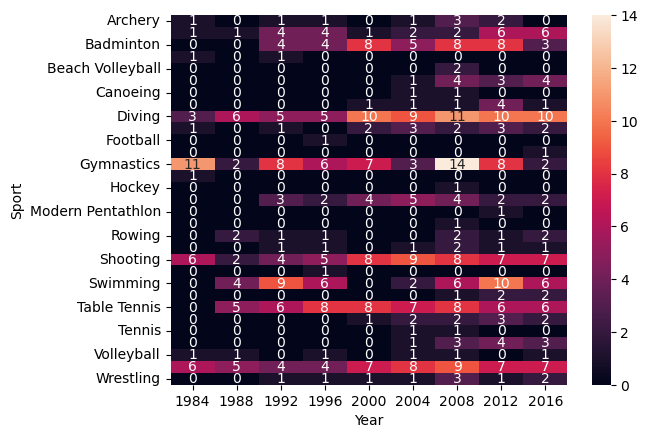

In [53]:
import seaborn as sns
sns.heatmap(new_df,annot=True)

# Athelete wise anlaysis

In [106]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [108]:
import plotly.figure_factory as ff

In [116]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [118]:
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222544       Russia   NaN    True  False   False  
222546    Argentina   NaN   False  False   False  
222548          USA   NaN   False  False   False  
222549       Russia   NaN   False  False   False  
222551      Belarus   NaN   False  False   False  

[116885 rows x 20 columns]

In [120]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

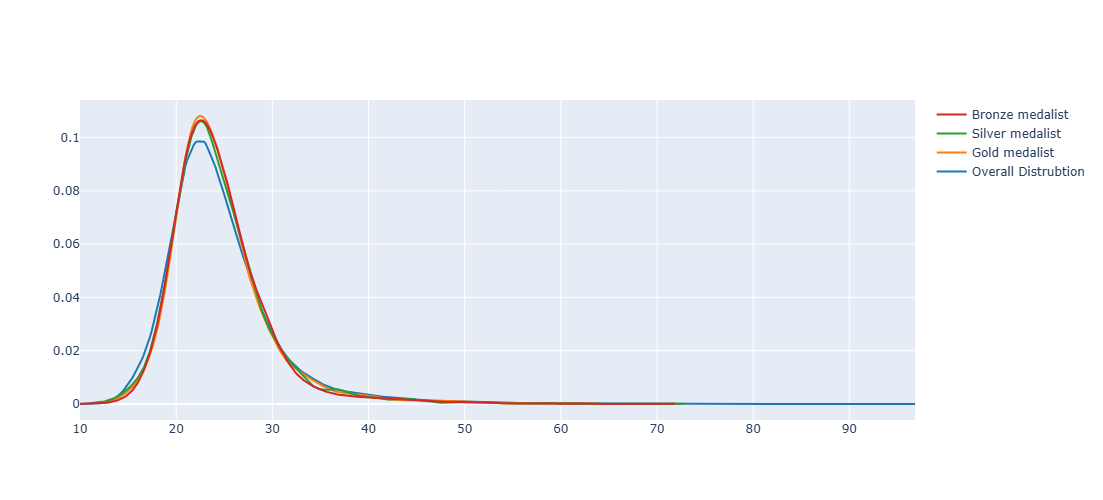

In [136]:
group_labels = ['Overall Distrubtion','Gold medalist','Silver medalist','Bronze medalist'] 
fig = ff.create_distplot([x1,x2,x3,x4], group_labels,show_hist=False,show_rug=False)
fig.update_layout(autosize=False,width=1000,height=500)
fig.show()

In [138]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [146]:
X = []
group_labels = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    X.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    group_labels.append(sport)
    

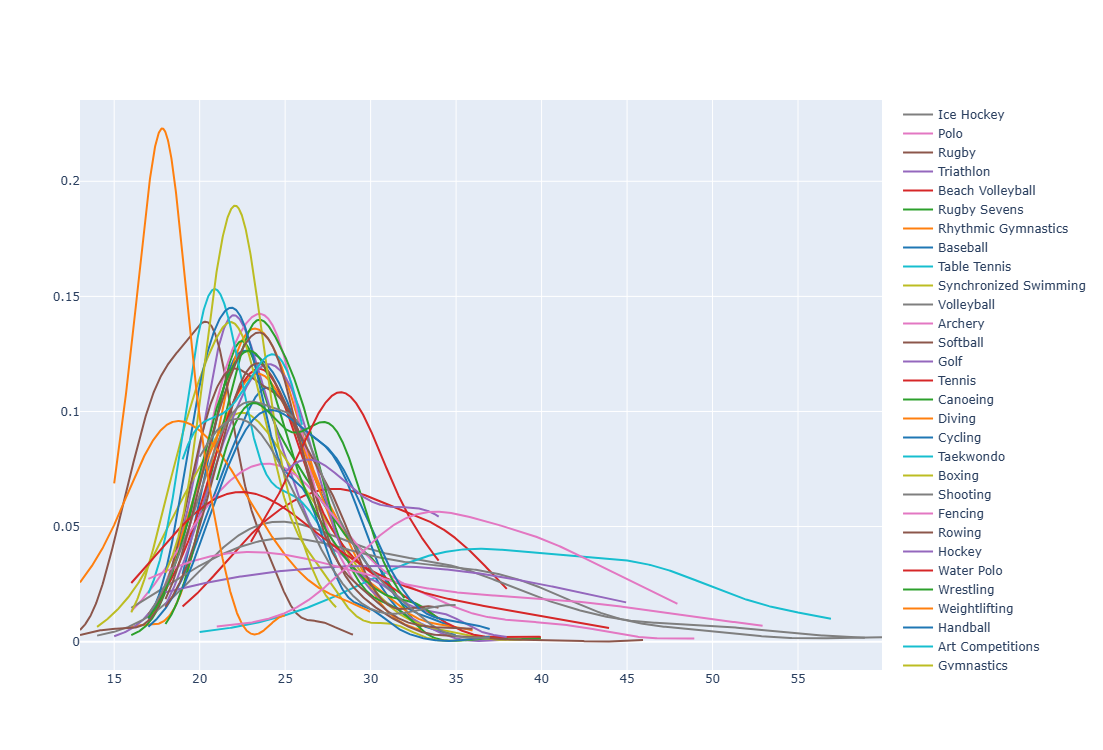

In [156]:
fig1 = ff.create_distplot(X, group_labels,show_hist=False,show_rug=False)
fig1.update_layout(autosize=False,width=1000,height=750)
fig1.show()

In [206]:
male_df = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
female_df = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [208]:
male_female_df = male_df.merge(female_df,how='left',on='Year')

In [210]:
male_female_df.fillna(0,inplace=True)

In [212]:
male_female_df.rename(columns={'Name_x': 'male', 'Name_y': 'female'}, inplace=True)

In [214]:
male_female_df

Year  male  female
0   1896   174     0.0
1   1900  1181    23.0
2   1904   629     6.0
3   1906   759     6.0
4   1908  1772    44.0
5   1912  1978    53.0
6   1920  2280    73.0
7   1924  2535   132.0
8   1928  2342   285.0
9   1932  1382   162.0
10  1936  3539   316.0
11  1948  3629   420.0
12  1952  3468   409.0
13  1956  2193   288.0
14  1960  3755   473.0
15  1964  3290   507.0
16  1968  3555   599.0
17  1972  4552   818.0
18  1976  3320  1028.0
19  1980  3151   875.0
20  1984  4299  1368.0
21  1988  4704  1734.0
22  1992  4769  2080.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2947.0
27  2012  3679  2919.0
28  2016  4022  3209.0

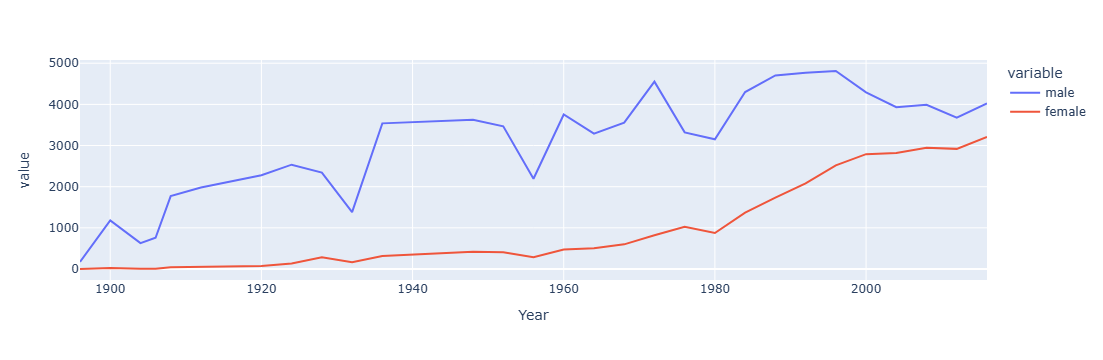

In [218]:
fig = px.line(male_female_df,x = 'Year',y=['male','female'], width=None,
    height=None,)
fig.show()